### Importing basic libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows",None)
sns.set()

### Importing the dataset

In [46]:
# load the dataset
train_data = pd.read_excel(r"Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [47]:
# check for the dataset information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Here we have all the attributes in object datatype except target variable which is in integer.

### EDA

In [48]:
#shape of dataset
train_data.shape

(10683, 11)

We have 10683 rows and 11 columns

In [49]:
#checking the missing values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We have missing values in columns like "Route" & "Total_Stops" which can dropped as it is very minimal for this huge dataset

In [50]:
#dropping the null values
train_data.dropna(inplace=True)

##### first I am going to treat Date_of_Journey attribute
* Its a object datatype
* I will convert this datatype into timestamp to use this columns for prediction

In [51]:
#checking the unique values
train_data["Date_of_Journey"].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [52]:
# we need to extract the date and month as a seperate columns as Journey_day is a object datatype. we will exclude the year as its only one year data.

#creating attribute for day
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

#creating attribute for month
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

# dropping the column
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [53]:
# now lets handle the columns Departure Time 
# it's a time when the plan leaves the airport.
# Similar to Date_of_Journey we will extract the values from Dep_time

#extracting hours
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

#extracting minutes
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

#dropping the Dep_Time column as it is of no use
train_data.drop('Dep_Time',axis=1,inplace=True)

In [54]:
# Arrival time is when the arrives
# Here also we will extract hours and minutes
# month details is already been pulled as Journey_month

#extracting the hours
train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour

#extract the minutes
train_data['Arrival_minute'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

#dropping the column Arriva_Time as its of no use
train_data.drop('Arrival_Time',axis=1,inplace=True)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [55]:
# Time taken by the plane to reach destination is called Duration
# It is the difference between Departure Time and Arrival Time.

# Assigning and converting Duration column into list
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"    # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]            # Add 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))      # Extra hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))     # Extract only minutes

In [56]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [57]:
# dropping the column Duration as it is of no use now.
train_data.drop('Duration',axis=1,inplace=True)

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int64 
 8   Journey_month    10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_minute   10682 non-null  int64 
 13  Duration_hours   10682 non-null  int64 
 14  Duration_mins    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


#### Handling Categorical Data

In [59]:
# unique values under Airline columns
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

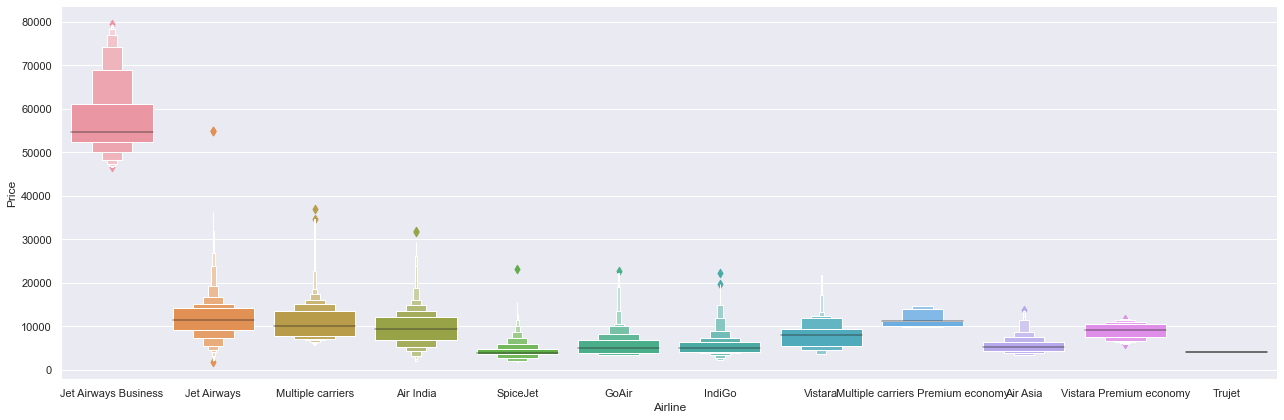

In [60]:
# The graph shows that Jet Airways Business has the highest price.
# Airline vs Price
sns.catplot(x="Airline", y="Price", data = train_data.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

In [61]:
# We will perform OneHotEncoding for Airline as its a Nominal Categorical

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [62]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

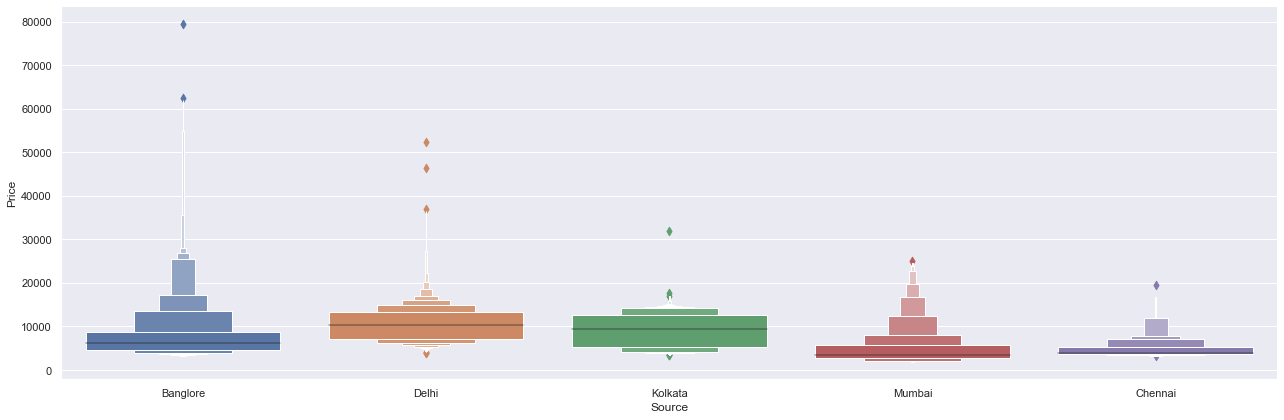

In [63]:
# Source vs Price
sns.catplot(x="Source", y="Price", data = train_data.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

In [64]:
# As source is Nominal Categoricals datat we will perform OneHotEncoding
# Here, Bangalore has been represented as "0".
Source = train_data[['Source']]

Source = pd.get_dummies(Source, drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [65]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [66]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
# Here, Bangalore has been represented as "0".
Destination = train_data[['Destination']]

Destination = pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [67]:
# check for the Route information
train_data["Route"]

0                                BLR → DEL
1                    CCU → IXR → BBI → BLR
2                    DEL → LKO → BOM → COK
3                          CCU → NAG → BLR
4                          BLR → NAG → DEL
5                                CCU → BLR
6                          BLR → BOM → DEL
7                          BLR → BOM → DEL
8                          BLR → BOM → DEL
9                          DEL → BOM → COK
10                         DEL → BLR → COK
11                               CCU → BLR
12                               MAA → CCU
13                         CCU → BOM → BLR
14                               CCU → BLR
15                   DEL → AMD → BOM → COK
16                         DEL → PNQ → COK
17                         DEL → BOM → COK
18                   DEL → CCU → BOM → COK
19                         DEL → BOM → COK
20                         DEL → BOM → COK
21                         BLR → COK → DEL
22                               BLR → DEL
23         

In [69]:
train_data["Additional_Info"]

0                             No info
1                             No info
2                             No info
3                             No info
4                             No info
5                             No info
6         In-flight meal not included
7                             No info
8         In-flight meal not included
9                             No info
10                            No info
11                            No info
12                            No info
13        In-flight meal not included
14                            No info
15                            No info
16                            No info
17        In-flight meal not included
18                            No info
19        In-flight meal not included
20                            No info
21                            No info
22                            No info
23                            No info
24        In-flight meal not included
25                            No info
26          

#### As we can that the columns that
* Route columns details are not usable for machine models 
* Additiona_info has got more than 70% no info values

Hence, dropping these two columns from the dataset

In [71]:
train_data.drop(["Route","Additional_Info"], axis=1, inplace=True)

In [74]:
# We will deal with Total_Stops variable
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [77]:
# As this is case of Original Categorical type we perform LabelEncoder
# Value here are assigned with corresponding keys

train_data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)

In [78]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [79]:
# Concatenate dataframe - train_data+Airline+Source+Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [80]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [81]:
# As we have done OneHotEncoding for the variables Airline, Source, Destination we are dropping these columns
data_train.drop(["Airline","Source","Destination"],axis=1, inplace=True)

In [84]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [86]:
# Check for the final shape of the dataset
data_train.shape

(10682, 30)

## Test Set

In [87]:
test_data = pd.read_excel(r"Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [94]:
 # preprocessing test dataset
    
print("Test data info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace=True)
print(test_data.isnull().sum())

#EDA

#Date_of_Journey
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month
test_data.drop('Date_of_Journey',axis=1,inplace=True)

# Dep_Time
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop('Dep_Time',axis=1,inplace=True)

# Arrival_Time
test_data['Arrival_hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_minute'] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop('Arrival_Time',axis=1,inplace=True)

# Duration 

duration = list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"    # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]            # Add 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))      # Extra hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))     # Extract only minutes
    
# Adding Duration to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis=1, inplace=True)

# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"],drop_first=True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"],drop_first=True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"],drop_first=True)

print()

# Dropping the columns as its of no use 
test_data.drop(["Route","Additional_Info"], axis=1, inplace=True)

# As this is case of Original Categorical type we perform LabelEncoder
# Value here are assigned with corresponding keys
test_data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)

# Concatenate dataframe - train_data+Airline+Source+Destination

data_test = pd.concat([test_data, Airline, Source, Destination], axis=1)

# As we have done OneHotEncoding for the variables Airline, Source, Destination we are dropping these columns
data_test.drop(["Airline","Source","Destination"],axis=1, inplace=True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [96]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


### Feature Selection
Finding the best feature which will contribute and has good relation with target variable

In [97]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [99]:
data_train.shape

(10682, 30)

In [100]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [101]:
X = data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

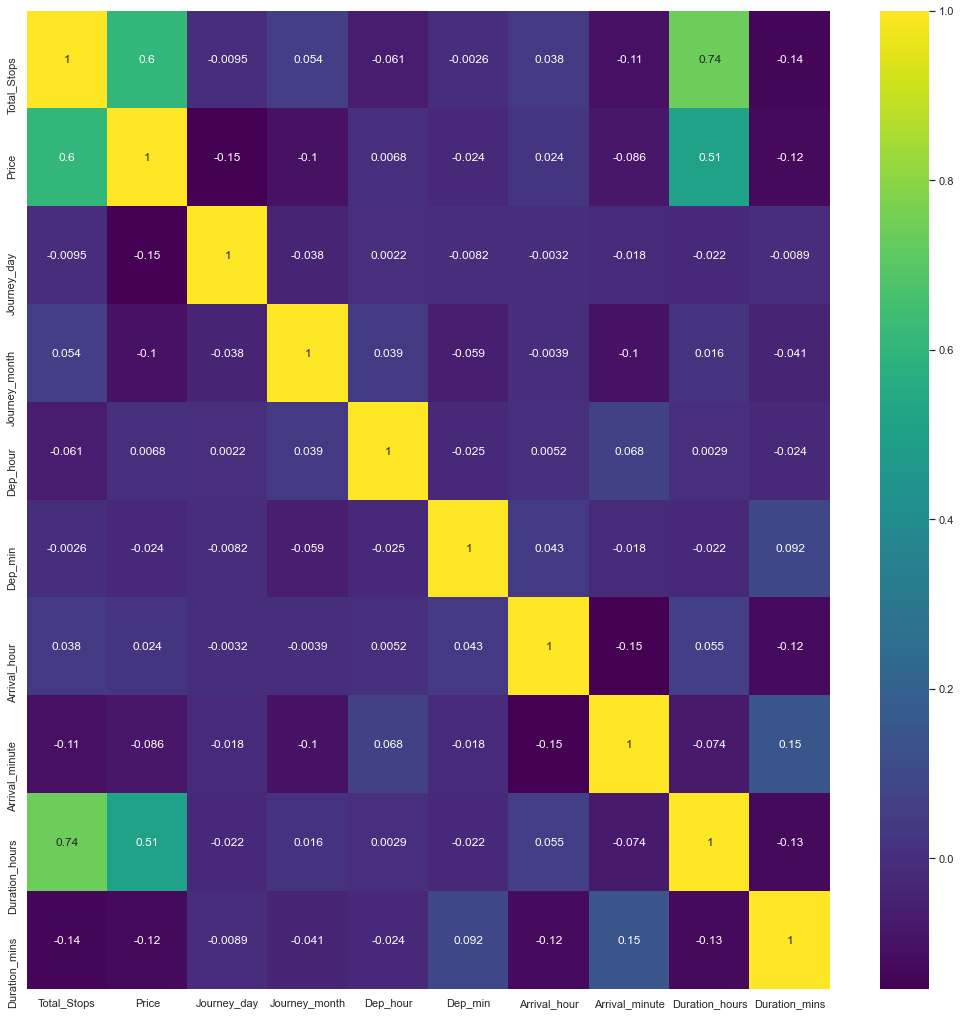

In [104]:
# Find correlation between Independent and Dependent attributes

plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='viridis')
plt.show()

In [106]:
# Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [107]:
print(selection.feature_importances_)

[2.25949682e-01 1.43281710e-01 5.37890446e-02 2.44309833e-02
 2.12929177e-02 2.76561247e-02 1.87289381e-02 1.26512987e-01
 1.76578453e-02 8.73026883e-03 1.79858102e-03 1.97882089e-02
 1.42469778e-01 6.72550228e-02 1.80860785e-02 8.56545969e-04
 2.83037745e-03 8.59330451e-05 4.82533988e-03 8.05486921e-05
 4.75120477e-04 8.84855948e-03 3.15655630e-03 5.75292037e-03
 1.11796694e-02 1.30646513e-02 6.06608100e-03 4.37564471e-04
 2.49119610e-02]


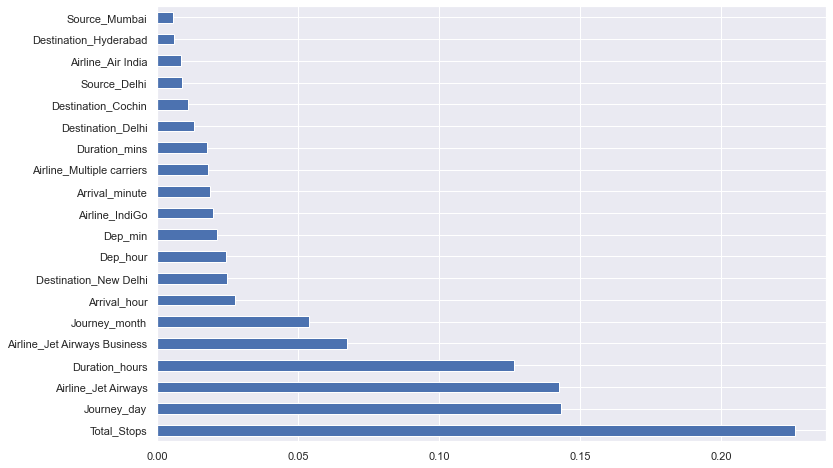

In [108]:
# plot graph of feature importances for better visualization
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Fitting model using Random Forest

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [112]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predrf = rf.predict(X_test)

In [114]:
rf.score(X_train,y_train)

0.9530113917159647

In [115]:
rf.score(X_test,y_test)

0.797055258695498

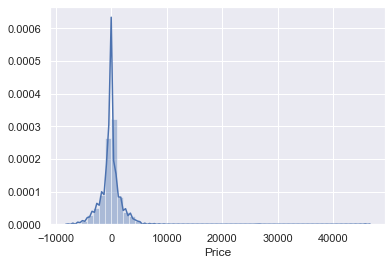

In [116]:
sns.distplot(y_test-predrf)
plt.show()

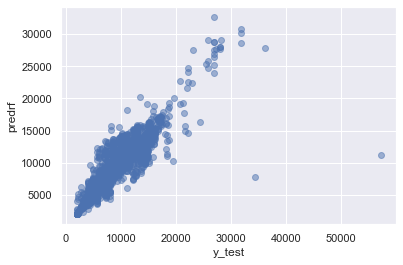

In [117]:
plt.scatter(y_test, predrf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("predrf")
plt.show()

In [118]:
from sklearn import metrics

In [120]:
print("MAE:",metrics.mean_absolute_error(y_test,predrf))
print("MSE:",metrics.mean_squared_error(y_test,predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predrf)))

MAE: 1174.8471239945907
MSE: 4375905.942700115
RMSE: 2091.8666168520676


In [121]:
metrics.r2_score(y_test,predrf)

0.797055258695498

### Hyperparameter Tuning
###### We use RandomizedSearchCV

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [125]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of leveles in tree
max_depth = [int(x) for x in np.linspace(5,30, num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [126]:
# create the random grid

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [132]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, scoring='neg_mean_squared_error',n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs=1)

In [133]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [134]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [137]:
prediction = rf_random.predict(X_test)
prediction

array([17024.20973723,  5652.01549923,  8642.55834486, ...,
        6886.91814453, 12417.93134929, 12534.26410356])

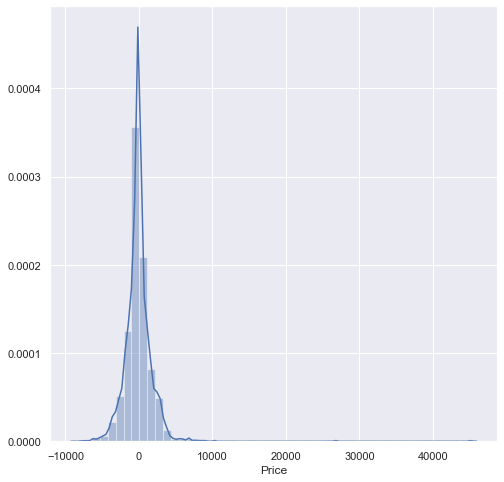

In [136]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

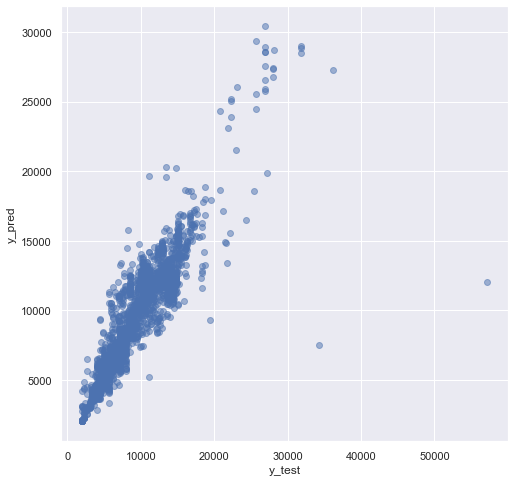

In [138]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [139]:
print("MAE:",metrics.mean_absolute_error(y_test,prediction))
print("MSE:",metrics.mean_squared_error(y_test,prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1163.8107728272562
MSE: 4046102.02668013
RMSE: 2011.492487353639


In [147]:
### Save the model to reuse 
# open a file, where we need to store the data
import pickle
file = open('fligh_rf.pkl','wb')

# dump information to that file
pickle.dump(rf_random,file)

In [148]:
model = open('fligh_rf.pkl','rb')
forest = pickle.load(model)

In [149]:
y_prediction= forest.predict(X_test)

In [150]:
metrics.r2_score(y_test,y_prediction)

0.8123508274975522